**AI&DA18 Batch 1 Lab Exam Name: Atharva M. Kulkarni GR No: 11810384**

Q4: Design and Implement your own CNN model to predict the face is with a mask or not using thefollowing dataset. (Use “Train” directory for training images)
Dataset Link: https://www.kaggle.com/ashishjangra27/face-mask-12k-images-dataset

A. Use Sufficient Number of Conv Layers, Activation functions and Loss functions

B. Train the model using 80% data and save trained model in .h5 format

C. Write a function to get output for a given input face image.

In [10]:
import numpy as np
import re
import os
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import cv2
from random import shuffle
from os import listdir
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation, Dropout
from tensorflow import keras
from google.colab.patches import cv2_imshow
import pickle

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
DATA_DIR = '/content/drive/MyDrive/Face Mask Dataset/Train'
VAL_DIR = '/content/drive/MyDrive/Face Mask Dataset/Validation'
IMG_SIZE = 50
categories = ['WithMask', 'WithoutMask']

In [6]:
def create_train_data():
  training_data = []
  for category in categories:
    path = os.path.join(DATA_DIR, category)
    class_num = np.array(categories.index(category))
    for img in tqdm(listdir(path)):
      try:
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        new_array = np.array(cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)))
        training_data.append([new_array, class_num])
      except Exception as e:
        pass

  return training_data

In [7]:
def create_validation_data():
  val_data = []
  for category in categories:
    path = os.path.join(VAL_DIR, category)
    class_num = categories.index(category)
    for img in tqdm(listdir(path)):
      try:
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        val_data.append([new_array, class_num])
      except Exception as e:
        pass

  return val_data

In [8]:
train = create_train_data()
shuffle(train)

100%|██████████| 5000/5000 [28:27<00:00,  2.93it/s]


In [9]:
val = create_validation_data()
shuffle(val)

100%|██████████| 400/400 [02:20<00:00,  2.85it/s]


In [12]:
#X_train = []
#y_train = []
#for features, labels in train:
#  X_train.append(features)
#  y_train.append(labels)

#X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
#y_train = np.array(y_train)
#X_train = X_train/255.0

#with open('/content/drive/MyDrive/Lab VP/mask_train_data.pkl', 'wb') as f:
#  pickle.dump((X_train, y_train), f)

with open('/content/drive/MyDrive/Lab VP/mask_train_data.pkl', 'rb') as f:
  X_train, y_train = pickle.load(f)

In [14]:
#X_val = []
#y_val = []
#for features, labels in val:
#  X_val.append(features)
#  y_val.append(labels)

#X_val = np.array(X_val).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
#y_val = np.array(y_val)
#X_val = X_val/255.0

#with open('/content/drive/MyDrive/Lab VP/mask_val_data.pkl', 'wb') as f:
#  pickle.dump((X_val, y_val), f)

with open('/content/drive/MyDrive/Lab VP/mask_val_data.pkl', 'rb') as f:
  X_val, y_val = pickle.load(f)

In [31]:
model = Sequential()
model.add(Conv2D(256, (3,3), input_shape = X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 256)       2560      
_________________________________________________________________
activation (Activation)      (None, 48, 48, 256)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 256)       590080    
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 256)       0

In [ ]:
model_history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
250/250 [==============================] - 397s 2s/step - loss: 0.3381 - accuracy: 0.8338 - val_loss: 0.1207 - val_accuracy: 0.9560
Epoch 2/10
250/250 [==============================] - 397s 2s/step - loss: 0.1181 - accuracy: 0.9581 - val_loss: 0.1119 - val_accuracy: 0.9580
Epoch 3/10
250/250 [==============================] - 394s 2s/step - loss: 0.0941 - accuracy: 0.9665 - val_loss: 0.0774 - val_accuracy: 0.9740
Epoch 4/10
250/250 [==============================] - 393s 2s/step - loss: 0.0734 - accuracy: 0.9760 - val_loss: 0.0712 - val_accuracy: 0.9735
Epoch 5/10
250/250 [==============================] - 393s 2s/step - loss: 0.0560 - accuracy: 0.9783 - val_loss: 0.0575 - val_accuracy: 0.9790
Epoch 6/10
250/250 [==============================] - 387s 2s/step - loss: 0.0545 - accuracy: 0.9811 - val_loss: 0.0676 - val_accuracy: 0.9725
Epoch 7/10
250/250 [==============================] - 385s 2s/step - loss: 0.0462 - accuracy: 0.9831 - val_loss: 0.0493 - val_accuracy: 0.9825

(<matplotlib.axes._subplots.AxesSubplot at 0x7f5524311fd0>,
 Text(0.5, 1.0, 'Loss'))

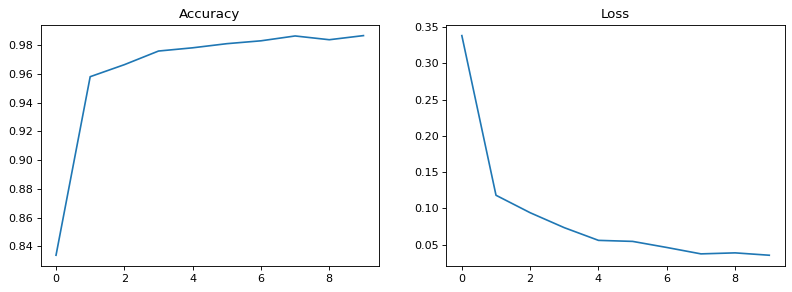

In [ ]:
train_loss = model_history.history['loss']
train_acc = model_history.history['accuracy']
epoch_range = range(1, 11)
plt.figure(figsize=(12, 4), dpi=80)
plt.subplot(1,2,1),plt.plot(train_acc), plt.title('Accuracy')
plt.subplot(1,2,2),plt.plot(train_loss),plt.title('Loss')

In [ ]:
model.save('/content/drive/MyDrive/FaceMask.h5')

In [15]:
model = keras.models.load_model('/content/drive/MyDrive/FaceMask.h5')
val_loss, val_acc = model.evaluate(X_val, y_val)

25/25 [==============================] - 9s 333ms/step - loss: 0.0392 - accuracy: 0.9850


In [16]:
def image_testing(img_path):
  img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
  return new_array

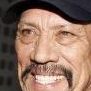

In [40]:
#img_path = '/content/drive/MyDrive/Face Mask Dataset/Test/WithMask/Augmented_58_3749134.png'
#img_path = '/content/drive/MyDrive/Face Mask Dataset/Test/WithMask/Augmented_391_7745278.png'
#img_path = '/content/drive/MyDrive/Face Mask Dataset/Test/WithoutMask/3402.png'
#img_path = '/content/drive/MyDrive/Face Mask Dataset/Test/WithoutMask/420.png'

#img_path = '/content/drive/MyDrive/Face Mask Dataset/Test/WithoutMask/1177.png'
img_path = '/content/drive/MyDrive/Face Mask Dataset/Test/WithoutMask/4391.png'

img = cv2.imread(img_path, cv2.IMREAD_COLOR)
cv2_imshow(img)

In [38]:
test_img = image_testing(img_path)
test_img = test_img.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
prediction = model.predict(test_img)

print(prediction[0][0])
if prediction[0][0] == 0:
  print("Wearing a mask")
else:
  print("Not wearing a mask")

0.8491958
Not wearing a mask
